# PythonMachineLearningCourse

In [4]:
# generate csv file
import csv

# packages for data analysis
import numpy as np
import pandas as pd

from sklearn import svm

# visual yout data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

### [csv.writer](https://docs.python.org/3/library/csv.html#csv.writer)
+ csv.writer(csvfile, dialect='excel', **fmtparams)

In [1]:
# Training data generation (can use pandas.DataFrame.to_csv instead)
with open('cake.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Type', 'Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt'])
    writer.writerow(['Muffin', '55', '28', '3', '7', '5', '2', '0', '0'])
    writer.writerow(['Muffin', '47', '24', '12', '6', '9', '1', '0', '0'])
    writer.writerow(['Muffin', '47', '23', '18', '6', '4', '1', '0', '0'])
    writer.writerow(['Muffin', '45', '11', '17', '17', '8', '1', '0', '0'])
    writer.writerow(['Muffin', '50', '25', '12', '6', '5', '2', '1', '0'])
    writer.writerow(['Muffin', '55', '27', '3', '7', '5', '2', '1', '0'])
    writer.writerow(['Muffin', '54', '27', '7', '5', '5', '2', '0', '0'])
    writer.writerow(['Muffin', '47', '26', '10', '10', '4', '1', '0', '0'])
    writer.writerow(['Muffin', '50', '17', '17', '8', '6', '1', '0', '0'])
    writer.writerow(['Muffin', '50', '17', '17', '11', '4', '1', '0', '0'])
    writer.writerow(['Cupcake', '39', '0', '26', '19', '14', '1', '1', '0'])
    writer.writerow(['Cupcake', '42', '21', '16', '10', '8', '3', '0', '0'])
    writer.writerow(['Cupcake', '34', '17', '20', '20', '5', '2', '1', '0'])
    writer.writerow(['Cupcake', '39', '13', '17', '19', '10', '1', '1', '0'])
    writer.writerow(['Cupcake', '38', '15', '23', '15', '8', '0', '1', '0'])
    writer.writerow(['Cupcake', '42', '18', '25', '9', '5', '1', '0', '0'])
    writer.writerow(['Cupcake', '36', '14', '21', '14', '11', '2', '1', '0'])
    writer.writerow(['Cupcake', '38', '15', '31', '8', '6', '1', '1', '0'])
    writer.writerow(['Cupcake', '36', '16', '24', '12', '9', '1', '1', '0'])
    writer.writerow(['Cupcake', '34', '17', '23', '11', '13', '0', '1', '0'])

### [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
+ pandas.read_csv(filepath_or_buffer, *, sep=_NoDefault.no_default, delimiter=None, header='infer', names=_NoDefault.no_default, index_col=None, usecols=None, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=_NoDefault.no_default, keep_date_col=False, date_parser=_NoDefault.no_default, date_format=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors='strict', dialect=None, on_bad_lines='error', delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None, storage_options=None, dtype_backend=_NoDefault.no_default)

In [6]:
recipes = pd.read_csv('cake.csv')
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


### [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)
+ seaborn.lmplot(data=None, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)

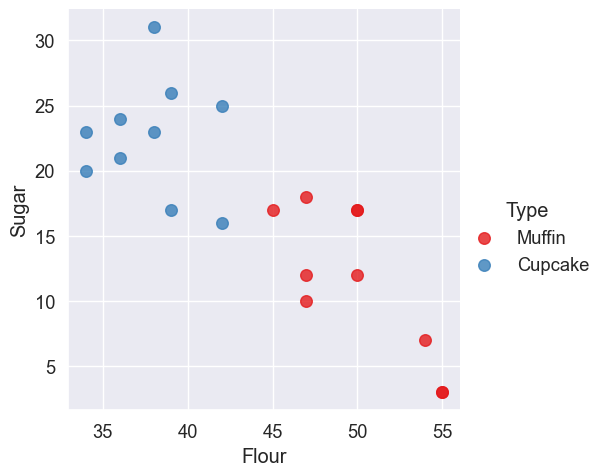

In [14]:
# plot our data - sugar and flour
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={'s': 70});

### [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html#numpy-where)
+ numpy.where(condition, [x, y, ]/)

### [pandas.DataFrame](https://pandas.pydata.org/docs/reference/frame.html#dataframe)
+ DataFrame([data, index, columns, dtype, copy])

In [19]:
# format or pre-process our data
type_label = np.where(recipes['Type']=='Muffin', 0, 1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [21]:
ingredients = recipes[['Flour', 'Sugar']].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

### [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
+ class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

### Methods:

### [fit](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit)
+ Fit the SVM model according to the given training data.
    + fit(X, y, sample_weight=None)

### [predict](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict)
+ Perform classification on samples in X.
    + predict(X)

### Attributes:
+ coef_: ndarray of shape (n_classes * (n_classes - 1) / 2, n_features)
    + Weights assigned to the features when kernel="linear".
    
+ intercept_: ndarray of shape (n_classes * (n_classes - 1) / 2,)
    + Constants in decision function.

+ support_vectors_: ndarray of shape (n_SV, n_features)
    + Support vectors.

In [25]:
# fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

### [Get the separating hyperplane](https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8)

In [44]:
# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

np.linspace(30, 60)

array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
       33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
       36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
       39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
       42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
       45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
       48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
       51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
       54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       57.55102041, 58.16326531, 58.7755102 , 59.3877551 , 60.        ])

### [matplotlib.pyplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
+ It provides a MATLAB-like way of plotting.

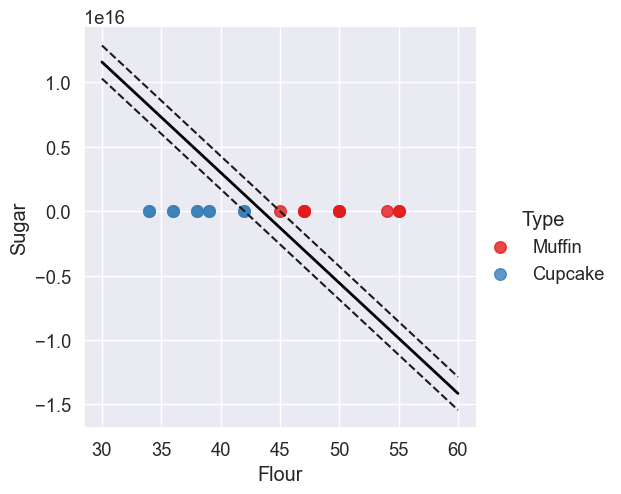

In [34]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={'s': 70});
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [35]:
# create a function to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if (model.predict([[flour, sugar]])) == 0:
        print('You\'re looking at a muffin recipe')
    else:
        print('You\'re looking at a cupcake recipe')
        
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe


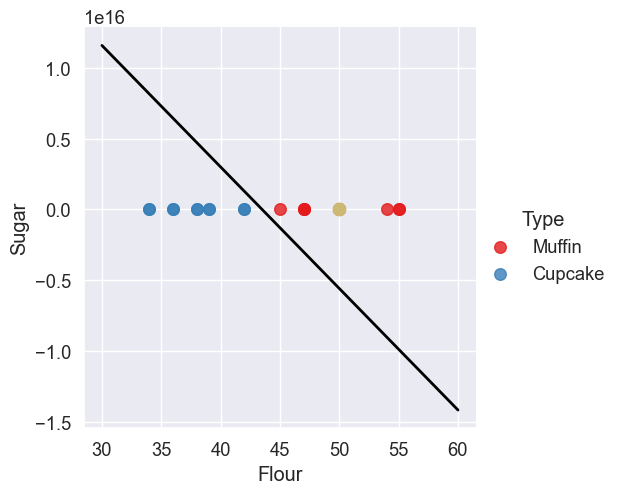

In [36]:
# Let's plot this on the graph
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={'s': 70});
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9')

In [37]:
muffin_or_cupcake(40, 20)

You're looking at a cupcake recipe


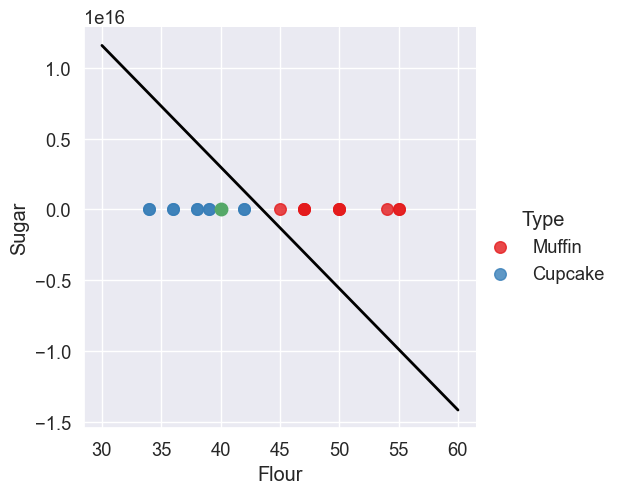

In [38]:
# Let's plot this on the graph
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={'s': 70});
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(40, 20, 'go', markersize='9')